<a href="https://colab.research.google.com/github/cristiangodoyangel/Pyhton-data-science/blob/main/Predicci%C3%B3n_Precios_Inmobiliarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# se cargan datos
patch='/content/drive/MyDrive/0002 Python - Data Science/Datasets/house-prices.csv'
df = pd.read_csv(patch)



In [22]:
# Se visualizan las primeras filas del dataset para entender su estructura
print(df.head())



   Home   Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
0     1  114300  1790         2          2       2    No         East
1     2  114200  2030         4          2       3    No         East
2     3  114800  1740         3          2       1    No         East
3     4   94700  1980         3          2       3    No         East
4     5  119800  2130         3          3       3    No         East


In [23]:
# Se muestran las últimas filas por si hay datos fuera de lo común
print(df.tail())



     Home   Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
123   124  119700  1900         3          3       3   Yes         East
124   125  147900  2160         4          3       3   Yes         East
125   126  113500  2070         2          2       2    No        North
126   127  149900  2020         3          3       1    No         West
127   128  124600  2250         3          3       4    No        North


In [24]:
# Se obtiene un resumen general del dataset: cantidad de registros, tipos de datos, valores no nulos
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB
None


In [25]:
# Se analizan estadísticas básicas de todas las columnas, incluyendo medias, mínimos, máximos y cuartiles
print(df.describe(include='all'))



              Home          Price         SqFt    Bedrooms   Bathrooms  \
count   128.000000     128.000000   128.000000  128.000000  128.000000   
unique         NaN            NaN          NaN         NaN         NaN   
top            NaN            NaN          NaN         NaN         NaN   
freq           NaN            NaN          NaN         NaN         NaN   
mean     64.500000  130427.343750  2000.937500    3.023438    2.445312   
std      37.094474   26868.770371   211.572431    0.725951    0.514492   
min       1.000000   69100.000000  1450.000000    2.000000    2.000000   
25%      32.750000  111325.000000  1880.000000    3.000000    2.000000   
50%      64.500000  125950.000000  2000.000000    3.000000    2.000000   
75%      96.250000  148250.000000  2140.000000    3.000000    3.000000   
max     128.000000  211200.000000  2590.000000    5.000000    4.000000   

            Offers Brick Neighborhood  
count   128.000000   128          128  
unique         NaN     2       

In [26]:
# Se verifica si hay valores nulos en alguna columna
print(df.isnull().sum())



Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64


In [27]:
# Se identifican los tipos de datos de cada columna (int, float, object, etc.)
print(df.dtypes)

Home             int64
Price            int64
SqFt             int64
Bedrooms         int64
Bathrooms        int64
Offers           int64
Brick           object
Neighborhood    object
dtype: object


In [28]:
# Se cuenta cuántas casas son de ladrillo y cuántas no
print(df['Brick'].value_counts())

# Se cuentan las casas según el vecindario
print(df['Neighborhood'].value_counts())


Brick
No     86
Yes    42
Name: count, dtype: int64
Neighborhood
East     45
North    44
West     39
Name: count, dtype: int64


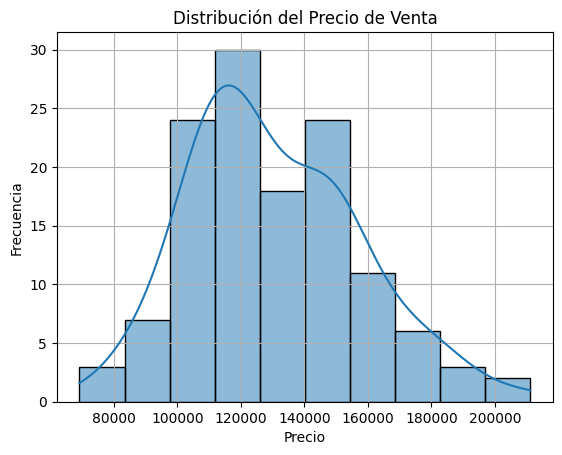

In [29]:
# Se grafica un histograma para ver cómo se distribuyen los precios de las casas
plt.figure()
sns.histplot(df['Price'], kde=True)
plt.title('Distribución del Precio de Venta')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


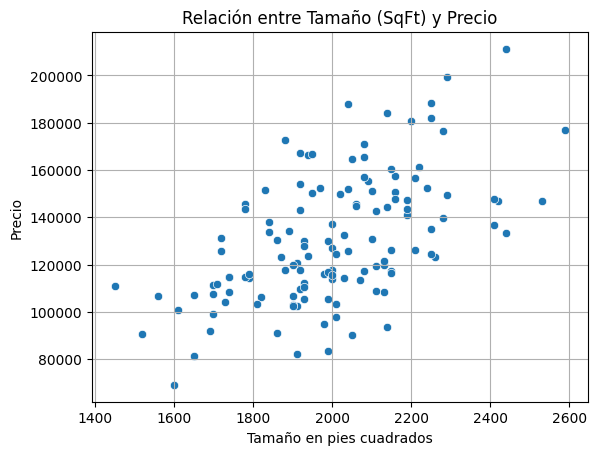

In [30]:
# Se crea un gráfico de dispersión para observar la relación entre el tamaño de la casa en pies cuadrados y su precio
plt.figure()
sns.scatterplot(x='SqFt', y='Price', data=df)
plt.title('Relación entre Tamaño (SqFt) y Precio')
plt.xlabel('Tamaño en pies cuadrados')
plt.ylabel('Precio')
plt.grid(True)
plt.show()


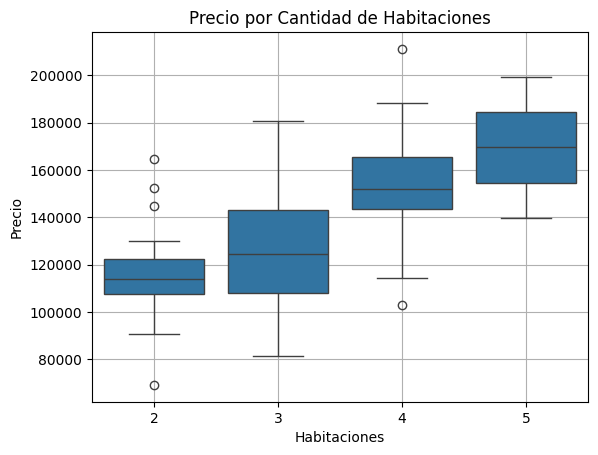

In [31]:
# Se usa un boxplot para visualizar cómo varía el precio dependiendo del número de habitaciones
plt.figure()
sns.boxplot(x='Bedrooms', y='Price', data=df)
plt.title('Precio por Cantidad de Habitaciones')
plt.xlabel('Habitaciones')
plt.ylabel('Precio')
plt.grid(True)
plt.show()


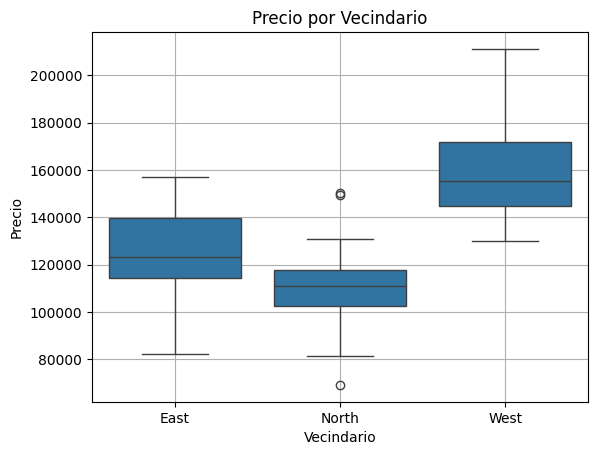

In [32]:
# Se analiza el precio promedio según el vecindario
plt.figure()
sns.boxplot(x='Neighborhood', y='Price', data=df)
plt.title('Precio por Vecindario')
plt.xlabel('Vecindario')
plt.ylabel('Precio')
plt.grid(True)
plt.show()



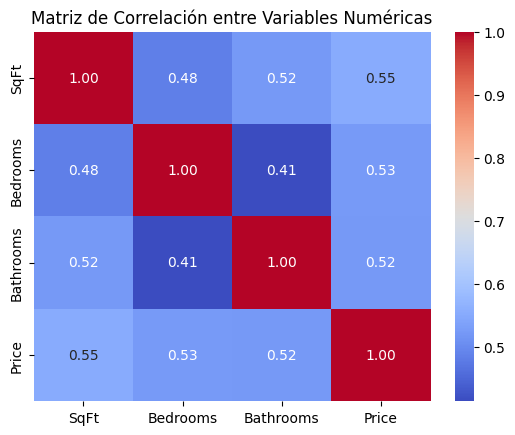

In [33]:
# Se calcula la correlación entre variables numéricas y se visualiza en un mapa de calor
plt.figure()
correlation_matrix = df[['SqFt', 'Bedrooms', 'Bathrooms', 'Price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()


In [34]:
# se convierten variables categóricas: Brick (Yes/No) a 1/0
df['Brick'] = df['Brick'].map({'Yes': 1, 'No': 0})

In [35]:
# se crean variables dummies para el vecindario (Neighborhood), sin dejar la primera para evitar multicolinealidad
df = pd.get_dummies(df, columns=['Neighborhood'], drop_first=True)


In [44]:
# se separan las variables predictoras y la variable objetivo
X = df[['SqFt', 'Bedrooms', 'Bathrooms']]
y = df['Price']

In [45]:
# se divide el dataset en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# se entrena el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

In [47]:
# se realizan predicciones con el conjunto de prueba
y_pred = modelo.predict(X_test)



In [51]:

# se crea el DataFrame con la nueva casa (mismas columnas que en el entrenamiento)
nueva_casa = pd.DataFrame([[2000, 501, 10]], columns=['SqFt', 'Bedrooms', 'Bathrooms'])

# se predice el precio para la nueva casa
precio_estimado = modelo.predict(nueva_casa)[0]

# se muestra el resultado
print(f"Precio estimado para una casa de 2000 ft², 1 habitaciones y 1 baños: ${precio_estimado:,.2f}")

Precio estimado para una casa de 2000 ft², 1 habitaciones y 1 baños: $5,346,708.66
